In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
mobility_data = pd.read_csv("graph_round2.csv")

In [3]:
mobility_data.head()

,source_state,target_state,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020,04-19-2020,...,11-13-2020,11-14-2020,11-15-2020,11-16-2020,11-17-2020,11-18-2020,11-19-2020,11-20-2020,11-21-2020,11-22-2020
0,Alabama,Alabama,616434.0,784114.0,756555.0,786938.0,792072.0,846587.0,783567.0,619458.0,...,1112571.0,998190.0,870529.0,949260.0,960719.0,982330.0,1009712.0,1069056.0,965796.0,872022.0
1,Alabama,Alaska,16.0,8.0,13.0,12.0,9.0,10.0,10.0,11.0,...,11.0,13.0,12.0,16.0,10.0,11.0,9.0,20.0,20.0,30.0
2,Alabama,Arizona,158.0,176.0,148.0,158.0,140.0,176.0,170.0,155.0,...,378.0,378.0,390.0,287.0,284.0,251.0,262.0,350.0,386.0,387.0
3,Alabama,Arkansas,298.0,399.0,370.0,401.0,649.0,683.0,650.0,412.0,...,644.0,633.0,495.0,432.0,491.0,513.0,509.0,900.0,1136.0,1106.0
4,Alabama,California,358.0,421.0,421.0,369.0,341.0,380.0,330.0,367.0,...,465.0,497.0,459.0,558.0,503.0,492.0,551.0,671.0,730.0,717.0


In [4]:
#name of the states
states = mobility_data['source_state'].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [5]:
#output dataframe
zero_data = np.zeros(shape=(len(states), mobility_data.shape[1]-1))
name = mobility_data.columns[2:]
name = name.insert(0,"states")

move_in_data = pd.DataFrame(zero_data, columns=name)
in_state_data = pd.DataFrame(zero_data, columns=name)
move_out_data = pd.DataFrame(zero_data, columns=name)
print("Shape of output dataframe: "+ str(move_in_data.shape[0]) + ',' + str(move_in_data.shape[1]))

Shape of output dataframe: 50,226


In [7]:
move_in_data['states'] = states
for i in range(len(states)):
    curr_df = mobility_data[(mobility_data['target_state'] == states[i]) & (mobility_data['source_state'] != states[i])].iloc[:,2:]
    move_in_data.iloc[i,1:] = curr_df.sum(axis=0)

move_in_data.tail()

,states,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020,04-19-2020,04-20-2020,...,08-22-2020,08-23-2020,08-24-2020,08-25-2020,08-26-2020,08-27-2020,08-28-2020,08-29-2020,08-30-2020,08-31-2020
45,Virginia,25351.0,32361.0,35309.0,35164.0,35589.0,37449.0,33156.0,29712.0,34607.0,...,91181.0,74204.0,63233.0,62676.0,63322.0,65607.0,71418.0,75619.0,66541.0,63565.0
46,Washington,12287.0,14897.0,15526.0,15118.0,15540.0,16027.0,14010.0,13304.0,16468.0,...,35531.0,30644.0,30248.0,29081.0,29939.0,30921.0,31973.0,32040.0,29617.0,32136.0
47,West Virginia,8836.0,12431.0,12699.0,13111.0,13070.0,13784.0,12077.0,11495.0,13564.0,...,30636.0,25569.0,22730.0,22331.0,23120.0,23468.0,25761.0,26621.0,23492.0,23126.0
48,Wisconsin,15454.0,19672.0,19162.0,19599.0,20029.0,21694.0,22391.0,19475.0,21716.0,...,60738.0,51970.0,34932.0,33992.0,34919.0,38344.0,47303.0,59526.0,47855.0,36208.0
49,Wyoming,4376.0,4595.0,4906.0,5123.0,4634.0,5543.0,5512.0,4716.0,5023.0,...,16743.0,14522.0,12330.0,11956.0,11766.0,12263.0,13213.0,13512.0,11619.0,11364.0


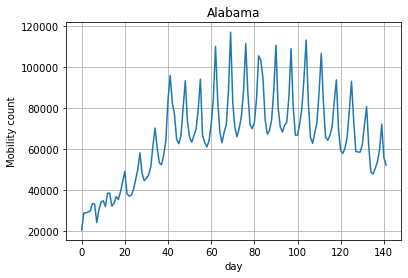

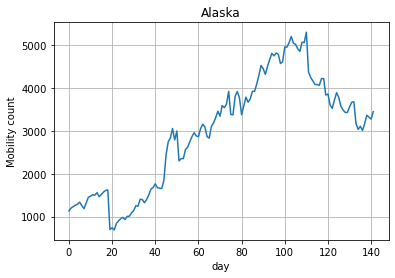

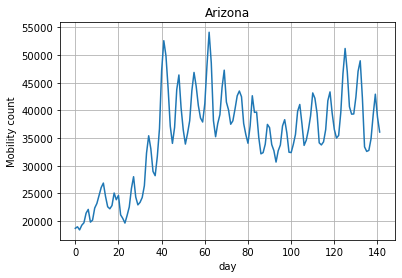

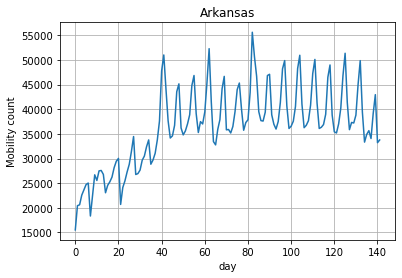

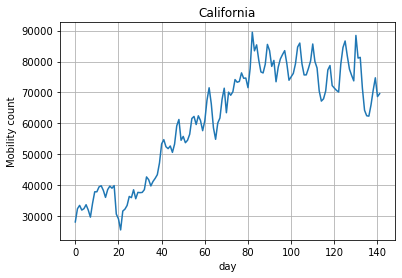

In [8]:
import matplotlib.pyplot as plt

for index in range(5):
    t = range(move_in_data.shape[1]-1)
    s = move_in_data.iloc[index,1:]

    fig, ax = plt.subplots()
    ax.plot(t, s)

    ax.set(xlabel='day', ylabel='Mobility count',
           title=move_in_data['states'][index])
    ax.grid()

    plt.show()

In [6]:
in_state_data['states'] = states
for i in range(len(states)):
    curr_df = mobility_data[(mobility_data['source_state'] == states[i]) & (mobility_data['target_state'] == states[i])].iloc[:,2:]
    in_state_data.iloc[i,1:] = curr_df.iloc[0,:]
print(in_state_data.tail())

           states  04-12-2020  04-13-2020  04-14-2020  04-15-2020  04-16-2020  \
45       Virginia    626699.0    687170.0    684302.0    685370.0    690980.0   
46     Washington    462425.0    508550.0    501313.0    511483.0    517387.0   
47  West Virginia    137638.0    151078.0    148059.0    153473.0    153370.0   
48      Wisconsin    423243.0    473760.0    457204.0    467623.0    472909.0   
49        Wyoming     34750.0     40976.0     40880.0     41813.0     39577.0   

    04-17-2020  04-18-2020  04-19-2020  04-20-2020  ...  11-13-2020  \
45    728394.0    666777.0    633008.0    674786.0  ...    897810.0   
46    536361.0    487999.0    465310.0    527009.0  ...    645563.0   
47    157741.0    145906.0    140938.0    157508.0  ...    210186.0   
48    501380.0    489012.0    451795.0    499230.0  ...    664230.0   
49     43157.0     40580.0     36705.0     42936.0  ...     54077.0   

    11-14-2020  11-15-2020  11-16-2020  11-17-2020  11-18-2020  11-19-2020  \
45    85

In [7]:
move_out_data['states'] = states
for i in range(len(states)):
    curr_df = mobility_data[(mobility_data['source_state'] == states[i]) & (mobility_data['target_state'] != states[i])].iloc[:,2:]
    move_out_data.iloc[i,1:] = curr_df.sum(axis=0)

move_out_data.tail()

,states,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020,04-19-2020,04-20-2020,...,11-13-2020,11-14-2020,11-15-2020,11-16-2020,11-17-2020,11-18-2020,11-19-2020,11-20-2020,11-21-2020,11-22-2020
45,Virginia,21872.0,25335.0,26495.0,26364.0,26944.0,29303.0,27717.0,24475.0,27208.0,...,57242.0,64476.0,51876.0,42520.0,39196.0,40574.0,44159.0,53162.0,65486.0,58457.0
46,Washington,15154.0,19040.0,19427.0,19703.0,20304.0,22038.0,19367.0,17352.0,20682.0,...,37584.0,36721.0,31009.0,29448.0,28964.0,30825.0,33351.0,36443.0,37621.0,34855.0
47,West Virginia,8919.0,13457.0,14375.0,14918.0,14999.0,15620.0,13305.0,11453.0,14547.0,...,25661.0,25529.0,18944.0,20082.0,19693.0,20206.0,21836.0,24468.0,25759.0,21142.0
48,Wisconsin,12617.0,18699.0,19793.0,19292.0,19762.0,19973.0,17819.0,16173.0,19326.0,...,38433.0,37672.0,30115.0,29323.0,28234.0,28719.0,31294.0,33948.0,36023.0,31990.0
49,Wyoming,2851.0,3424.0,3442.0,3575.0,3472.0,3994.0,3866.0,3312.0,3748.0,...,6026.0,5846.0,4862.0,4630.0,4400.0,4660.0,5141.0,5603.0,6503.0,5460.0


In [8]:
#write into csv
move_in_data.to_csv("move_in_data_round2.csv")
in_state_data.to_csv("in_state_data_round2.csv")
move_out_data.to_csv("move_out_data_round2.csv")

In [11]:
#weekly analysis
in_state_by_weekday = [0]*7
move_out_by_weekday = [0]*7
freq = [0]*7
for i in range(1,move_in_data.shape[1]):
    day = (i-1)%7
    freq[day] += 1
    in_state_by_weekday[day] += sum(in_state_data.iloc[:,i])
    move_out_by_weekday[day] += sum(move_out_data.iloc[:,i])

weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

in_state_by_weekday = [a/b for a,b in zip(in_state_by_weekday, freq)]
move_out_by_weekday = [a/b for a,b in zip(move_out_by_weekday, freq)]

print(in_state_by_weekday)
print(move_out_by_weekday)

[32456838.14285714, 35380150.23809524, 35890462.95, 36256451.65, 36557050.7, 37979797.8, 35972627.4]
[2090584.857142857, 1965507.7142857143, 1945255.75, 2000076.1, 2123504.35, 2371234.5, 2517233.15]


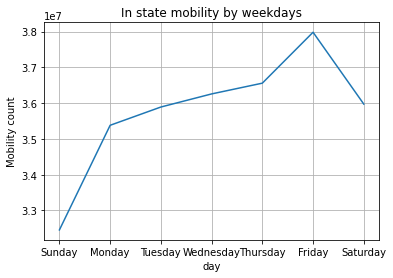

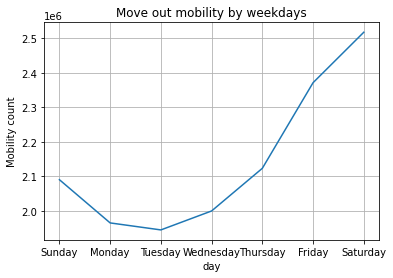

In [14]:
fig1, ax1 = plt.subplots()
ax1.plot(weekdays, in_state_by_weekday)

ax1.set(xlabel='day', ylabel='Mobility count',
       title="In state mobility by weekdays")
ax1.grid()

fig2, ax2 = plt.subplots()
ax2.plot(weekdays, move_out_by_weekday)

ax2.set(xlabel='day', ylabel='Mobility count',
       title="Move out mobility by weekdays")
ax2.grid()
plt.show()

In [12]:
train = pd.read_csv("train.csv")

In [13]:
train.head()

,ID,Province_State,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,Alabama,04-12-2020,3563,93,NaN,3470.0,75.988020,21583.0,437.0,2.610160,460.300152,12.264945
1,1,Alaska,04-12-2020,272,8,66.0,264.0,45.504049,8038.0,31.0,2.941176,1344.711576,11.397059
2,2,Arizona,04-12-2020,3542,115,NaN,3427.0,48.662422,42109.0,NaN,3.246753,578.522286,NaN
3,3,Arkansas,04-12-2020,1280,27,367.0,1253.0,49.439423,19722.0,130.0,2.109375,761.753354,10.156250
4,4,California,04-12-2020,22795,640,NaN,22155.0,58.137726,190328.0,5234.0,2.812020,485.423869,22.961176


In [14]:
#DTW
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [19]:
curr_df = train[train['Province_State'] == 'Florida']
curr_in_state = np.array(in_state_data[in_state_data['states'] == 'Florida'])[0][1:]
x = np.array(curr_df['Confirmed'])
diff = np.array([0]*(len(x)-1))
for i in range(len(x)-1):
    diff[i] = x[i+1] - x[i]
print(diff[0:10])
print(curr_in_state[0:10])

[1124  609  883  832 1416  733  822  745  810  440]
[1814401.0 2115619.0 1985172.0 2032261.0 2021663.0 2134467.0 1972163.0
 1823016.0 2079995.0 2302593.0]


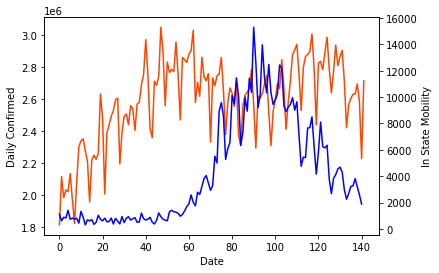

In [20]:
import matplotlib.pyplot as mp
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() #second y-axis
ax1.plot(range(142), curr_in_state, c='orangered',label='In state mobility')
ax2.plot(range(len(diff)), diff, c='blue',label='Daily Confirmed')

ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Confirmed')
ax2.set_ylabel('In State Mobility')

plt.show()

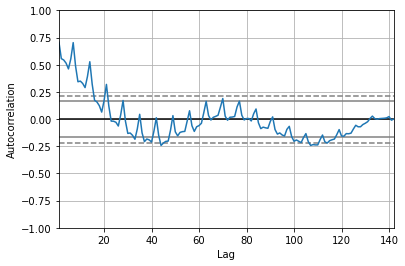

In [21]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(curr_in_state)
pyplot.show()

In [ ]:
#cross correlation
